### Efficient Frontier Graph: Showing the Power of Diversification ###



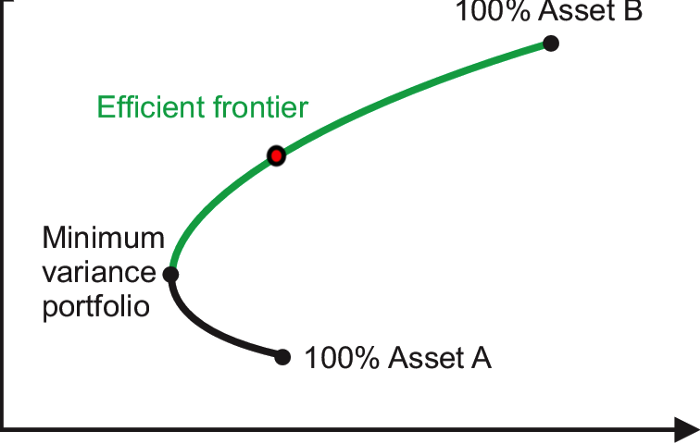

## Calculating the Risk of a Portfolio ##

#### To calculate the risk of a portfolio, you need the weight of each asset, the standard deviation of each asset’s return, and the correlation between the assets. ####

## Standard Deviation of Portfolio Consisting of Two Assets ##




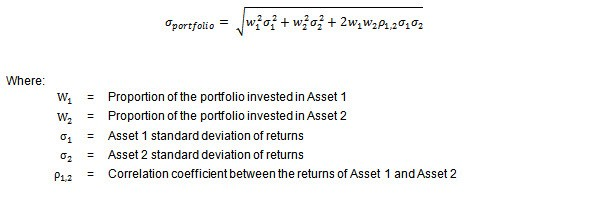

In [102]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader.data import DataReader
from datetime import date  # Date & time functionality

In [104]:
start = date(2016, 1, 1)
end = date(2021, 11, 1)
ticker = 'AAPL', 'GOOG', 'AMZN', 'TSLA'
data_source = 'yahoo'
stock_data = DataReader(ticker, data_source, start, end)

In [105]:
stock_data = stock_data.reset_index()

In [106]:
stock_data.columns = [f'{j}{i}' for j,i in stock_data.columns]


In [107]:
stock_data.head()

,Date,Adj CloseAAPL,Adj CloseGOOG,Adj CloseAMZN,Adj CloseTSLA,CloseAAPL,CloseGOOG,CloseAMZN,CloseTSLA,HighAAPL,...,LowAMZN,LowTSLA,OpenAAPL,OpenGOOG,OpenAMZN,OpenTSLA,VolumeAAPL,VolumeGOOG,VolumeAMZN,VolumeTSLA
0,2016-01-04,24.251432,741.840027,636.989990,44.681999,26.337500,741.840027,636.989990,44.681999,26.342501,...,627.510010,43.799999,25.652500,743.000000,656.289978,46.144001,270597600.0,3272800.0,9314500.0,34135500.0
1,2016-01-05,23.643713,742.580017,633.789978,44.686001,25.677500,742.580017,633.789978,44.686001,26.462500,...,627.650024,44.000000,26.437500,746.450012,646.859985,45.271999,223164000.0,1950700.0,5822600.0,15934000.0
2,2016-01-06,23.181011,743.619995,632.650024,43.807999,25.174999,743.619995,632.650024,43.807999,25.592501,...,620.309998,43.195999,25.139999,730.000000,622.000000,44.000000,273829600.0,1947000.0,5329200.0,18895500.0
3,2016-01-07,22.202671,726.390015,607.940002,43.130001,24.112499,726.390015,607.940002,43.130001,25.032499,...,605.210022,42.734001,24.670000,730.309998,621.799988,42.838001,324377600.0,2963700.0,7074900.0,17771500.0
4,2016-01-08,22.320068,714.469971,607.049988,42.200001,24.240000,714.469971,607.049988,42.200001,24.777500,...,606.000000,42.153999,24.637501,731.450012,619.659973,43.571999,283192000.0,2450900.0,5512900.0,18140500.0


In [108]:
stock_data.sort_values('Date')

,Date,Adj CloseAAPL,Adj CloseGOOG,Adj CloseAMZN,Adj CloseTSLA,CloseAAPL,CloseGOOG,CloseAMZN,CloseTSLA,HighAAPL,...,LowAMZN,LowTSLA,OpenAAPL,OpenGOOG,OpenAMZN,OpenTSLA,VolumeAAPL,VolumeGOOG,VolumeAMZN,VolumeTSLA
0,2016-01-04,24.251432,741.840027,636.989990,44.681999,26.337500,741.840027,636.989990,44.681999,26.342501,...,627.510010,43.799999,25.652500,743.000000,656.289978,46.144001,270597600.0,3272800.0,9314500.0,34135500.0
1,2016-01-05,23.643713,742.580017,633.789978,44.686001,25.677500,742.580017,633.789978,44.686001,26.462500,...,627.650024,44.000000,26.437500,746.450012,646.859985,45.271999,223164000.0,1950700.0,5822600.0,15934000.0
2,2016-01-06,23.181011,743.619995,632.650024,43.807999,25.174999,743.619995,632.650024,43.807999,25.592501,...,620.309998,43.195999,25.139999,730.000000,622.000000,44.000000,273829600.0,1947000.0,5329200.0,18895500.0
3,2016-01-07,22.202671,726.390015,607.940002,43.130001,24.112499,726.390015,607.940002,43.130001,25.032499,...,605.210022,42.734001,24.670000,730.309998,621.799988,42.838001,324377600.0,2963700.0,7074900.0,17771500.0
4,2016-01-08,22.320068,714.469971,607.049988,42.200001,24.240000,714.469971,607.049988,42.200001,24.777500,...,606.000000,42.153999,24.637501,731.450012,619.659973,43.571999,283192000.0,2450900.0,5512900.0,18140500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,2021-10-26,149.102402,2793.439941,3376.070068,1018.429993,149.320007,2793.439941,3376.070068,1018.429993,150.839996,...,3343.979980,1001.440002,149.330002,2812.120117,3349.510010,1024.689941,60893400.0,1412900.0,2698300.0,62415000.0
1465,2021-10-27,148.633087,2928.550049,3392.489990,1037.859985,148.850006,2928.550049,3392.489990,1037.859985,149.729996,...,3371.449951,1030.780029,149.360001,2798.050049,3388.000000,1039.660034,56094900.0,2592500.0,2702200.0,38526500.0
1466,2021-10-28,152.347656,2922.580078,3446.570068,1077.040039,152.570007,2922.580078,3446.570068,1077.040039,153.169998,...,3386.000000,1054.199951,149.820007,2945.979980,3402.100098,1068.310059,100077900.0,1620900.0,5708700.0,27213200.0
1467,2021-10-29,149.581696,2965.409912,3372.429932,1114.000000,149.800003,2965.409912,3372.429932,1114.000000,149.940002,...,3273.320068,1073.209961,147.220001,2910.399902,3300.020020,1081.859985,124850400.0,1447700.0,6469500.0,29918400.0


In [109]:
stock_data_new = pd.wide_to_long(stock_data,
                stubnames = ['Open','High','Low', 'Close', 'Adj Close','Volume'],
                i= 'Date',
                j='Ticker',
                suffix= '.+',
                sep = "")

In [110]:
stock_data_new.head()

,,Open,High,Low,Close,Adj Close,Volume
Date,Ticker,,,,,,
2016-01-04,AAPL,25.652500,26.342501,25.500000,26.337500,24.251432,270597600.0
2016-01-05,AAPL,26.437500,26.462500,25.602501,25.677500,23.643713,223164000.0
2016-01-06,AAPL,25.139999,25.592501,24.967501,25.174999,23.181011,273829600.0
2016-01-07,AAPL,24.670000,25.032499,24.107500,24.112499,22.202671,324377600.0
2016-01-08,AAPL,24.637501,24.777500,24.190001,24.240000,22.320068,283192000.0


In [111]:
stock_data_new = stock_data_new.reset_index()

In [112]:
stock_data_new = stock_data_new.set_index('Date')

In [113]:
stock_data_new.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5876 entries, 2016-01-04 to 2021-11-01
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     5876 non-null   object 
 1   Open       5876 non-null   float64
 2   High       5876 non-null   float64
 3   Low        5876 non-null   float64
 4   Close      5876 non-null   float64
 5   Adj Close  5876 non-null   float64
 6   Volume     5876 non-null   float64
dtypes: float64(6), object(1)
memory usage: 367.2+ KB


In [114]:
stock_data_new = stock_data_new.drop(["Close","Open", "High", "Low", "Volume"], axis=1)

In [115]:
stock_data_new.head()

,Ticker,Adj Close
Date,,
2016-01-04,AAPL,24.251432
2016-01-05,AAPL,23.643713
2016-01-06,AAPL,23.181011
2016-01-07,AAPL,22.202671
2016-01-08,AAPL,22.320068


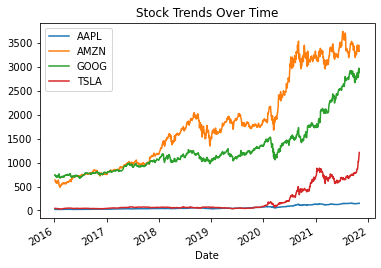

In [116]:
stock_data_new.groupby('Ticker')['Adj Close'].plot(title = 'Stock Trends Over Time',legend = 'Ticker')
plt.show()

In [117]:
stock_adj = stock_data_new.pivot_table(index=["Date"], 
                    columns='Ticker', 
                    values='Adj Close')

In [118]:
stock_adj.head()

Ticker,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-01-04,24.251432,636.989990,741.840027,44.681999
2016-01-05,23.643713,633.789978,742.580017,44.686001
2016-01-06,23.181011,632.650024,743.619995,43.807999
2016-01-07,22.202671,607.940002,726.390015,43.130001
2016-01-08,22.320068,607.049988,714.469971,42.200001


In [119]:
returns = stock_adj.pct_change()
mean_returns = returns.mean()
return_variance = returns.var()
cov_matrix = returns.cov()
corr_matrix = returns.corr()


In [120]:
returns.head()

Ticker,AAPL,AMZN,GOOG,TSLA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,-0.025059,-0.005024,0.000998,0.000090
2016-01-06,-0.019570,-0.001799,0.001400,-0.019648
2016-01-07,-0.042204,-0.039058,-0.023170,-0.015477
2016-01-08,0.005288,-0.001464,-0.016410,-0.021563


In [121]:
mean_returns

Ticker
AAPL    0.001409
AMZN    0.001297
GOOG    0.001058
TSLA    0.002893
dtype: float64

In [122]:
return_variance

Ticker
AAPL    0.000344
AMZN    0.000345
GOOG    0.000270
TSLA    0.001296
dtype: float64

In [123]:
cov_matrix

Ticker,AAPL,AMZN,GOOG,TSLA
Ticker,,,,
AAPL,0.000344,0.000206,0.000196,0.000262
AMZN,0.000206,0.000345,0.000200,0.000243
GOOG,0.000196,0.000200,0.000270,0.000209
TSLA,0.000262,0.000243,0.000209,0.001296


In [124]:
cov_martrix_annual = cov_matrix * 252

In [125]:
annual_returns = mean_returns * 252

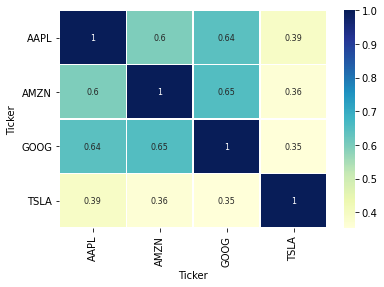

In [164]:
import seaborn as sns

# Create a heatmap
sns.heatmap(corr_matrix,
            annot=True,
            cmap="YlGnBu", 
            linewidths=0.3,
            annot_kws={"size": 8})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()

In [142]:
portfolio_returns = []
portfolio_volatilities = []
stock_weights = []
num_stocks = len(ticker)
num_portfolios = 50000
for x in range(num_portfolios):
    weights = np.random.random(num_stocks)
    weights /= np.sum(weights)
    portfolio_returns.append(np.sum(weights * annual_returns))
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(cov_martrix_annual, weights))))
    stock_weights.append(weights)
# A dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': portfolio_returns,
             'Volatility': portfolio_volatilities}                  

    
# Dataframe of the extended dictionary
portfolio = pd.DataFrame(portfolio)

# Extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(ticker):
    portfolio[symbol+' weight'] = [weight[counter] for weight in stock_weights]

# make a nice dataframe of the extended dictionary
portfolio_df = pd.DataFrame(portfolio)





In [156]:
portfolio_df.head()

,Returns,Volatility,AAPL weight,GOOG weight,AMZN weight,TSLA weight,Sharpe
0,0.460290,0.305308,0.554551,0.065763,0.075440,0.304246,1.474870
1,0.483347,0.319640,0.239996,0.306069,0.070982,0.382953,1.480874
2,0.459953,0.305476,0.426565,0.023934,0.216131,0.333370,1.472959
3,0.465793,0.314810,0.225938,0.014241,0.374275,0.385545,1.447835
4,0.455789,0.302936,0.396312,0.023827,0.249711,0.330150,1.471559


In [149]:
# Risk free rate
risk_free = 0.01

# Calculate the Sharpe Ratio for each asset
portfolio_df['Sharpe'] = (portfolio_df['Returns'] - risk_free)/portfolio_df['Volatility']
# Print the range of Sharpe ratios
print(portfolio_df['Sharpe'].describe()[['min', 'max']])


min    1.042697
max    1.493913
Name: Sharpe, dtype: float64


In [150]:
min_risk_port = portfolio_df.iloc[portfolio['Volatility'].idxmin()]

In [159]:
max_risk_port = portfolio_df.iloc[portfolio['Volatility'].idxmax()]

In [152]:
# Finding the optimal portfolio
max_sharpe_port = portfolio_df.iloc[portfolio['Sharpe'].idxmax()]

In [157]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolio_df.iloc[((portfolio['Returns']-rf)/portfolio['Volatility']).idxmax()]
optimal_risky_port

Returns        0.458160
Volatility     0.299991
AAPL weight    0.380016
GOOG weight    0.262260
AMZN weight    0.050279
TSLA weight    0.307446
Sharpe         1.493913
Name: 41476, dtype: float64

No handles with labels found to put in legend.


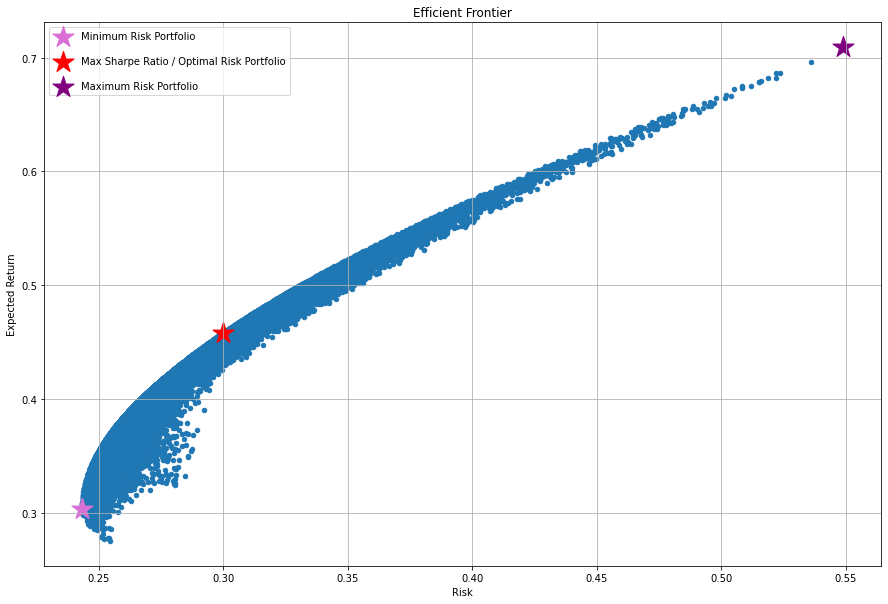

In [163]:
portfolio_df.plot(x='Volatility', y='Returns', kind='scatter', figsize=(15,10),grid=True);
plt.legend()
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')

plt.scatter(min_risk_port[1], min_risk_port[0], color='orchid', marker='*', s=500, label = 'Minimum Risk Portfolio')
plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            color='r', marker='*', s=500, label='Max Sharpe Ratio / Optimal Risk Portfolio')
plt.scatter(max_risk_port[1], max_risk_port[0],
            color='purple', marker='*', s=500, label='Maximum Risk Portfolio')
plt.legend(labelspacing=1.5)
plt.show()
plt.show()

## Citation: ##

##### Harry Markowitz’s Efficient Frontier with Python by Jacopo Medaglia #####
https://www.rubikpm.com/markowitz-ef-python